# Code for the 2022 IMI Big Data and Artificial Intelligence Case Competition
In this Git, we conducted several analyses to predict the probability of corporate default from financial data of Canadian medium-sized entities. Any sensitive information (e.g., customer ID info) has been removed or modified as necessary.
The three primary methods to tackle this problem are logisitc regression, support vector machine (SVM), and XGBoost to assess the following specific problems:
1. Binary classification to predict good (investment grade) vs bad (non-investment grade) credit rating
2. Conduct multi-class classification to predict the credit rating of a medium-sized entity ranging from 1 (the best credit and least likely to default on a loan) to 17 (the worst credit and most likely to default on a loan)

# Major highlights of results
1. Cleaned the data by removing missing values and outliers
2. Engineered new features and identified key features using recurssive feature elimination
3. Achieved good performance for both binary and multiclass classification through hyperparameter tuning
4. Discovered data structure using clustering analysis


In [1]:
## Importing necessart packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Feature selection using recursive feature elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [ ]:
data_rfe, data_rest = train_test_split(data_rest, test_size=0.5, random_state=42)

In [ ]:
data_rfe.head()

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,B_PLUS_FLAG,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
13506,12999,1,5,7,1,618839.838959,610659.999950,587171.348868,591203.937414,626701.490857,617703.859028,624333.172904,622373.719199,594630.595292,616529.727915,620683.005710,584786.813940,627539.252142,610766.959194,570810.966045,6.177172e+05,5.824357e+05,577943.725197,589494.900624,589469.916876,609839.073623,582286.459732,619409.807526,576216.168085,590529.194483,589003.427586,584347.999825,626993.004481,583918.154279,584743.121920,1.003793,0.067838,1.067705,2.132059,0.500786,0.489818,1.040713,0.994237,0.468368,0.998859,1.014328,0.967034,1.041672,0.973751,1.012657,0.957559,0.467060,0.984916,1.880000,1.058232,0.999080
16244,4069,0,21,7,1,620867.515260,632518.577474,620177.300336,620380.806098,589170.251725,625171.384079,590962.754560,602706.396742,593138.962887,617882.676586,625107.862008,599338.369417,614565.100032,617662.331332,588651.380481,6.029319e+05,6.245150e+05,608130.846465,593376.314932,575352.210294,585000.373422,598414.250093,630964.316028,583977.420939,592547.317357,611855.278578,596905.579219,614860.429964,621110.440466,599035.430633,0.996967,-0.013089,0.986524,1.992652,0.495081,0.529894,1.046749,1.045928,0.520337,0.955135,0.997543,0.936806,1.063771,0.937742,0.956432,0.947064,0.501323,0.964592,2.049014,1.035922,0.983998
13390,6679,0,30,4,1,603287.158785,626997.022379,611969.094801,570361.649121,587237.024923,604566.654224,586223.596293,587964.310216,618843.498616,588818.219410,591534.946094,583478.147430,594698.508877,572211.539171,597091.120693,1.043364e+09,1.031573e+09,573343.069452,615486.771022,600166.805092,607295.065623,613063.077083,609350.150813,603911.830014,622090.414232,604679.406217,622320.921308,629541.402663,623346.343158,621213.584726,1.001729,-0.059847,0.943675,1.890152,0.499259,0.533984,0.974862,0.921657,0.530874,1.090695,0.971855,0.992174,0.984660,0.986996,0.995594,0.990776,0.522117,1.074867,2.091170,1.033950,0.990050
576,5470,0,20,6,1,580284.895237,588944.723157,589861.609571,612923.980942,588982.191447,584834.510787,620232.216358,597068.411157,611200.591425,595719.536869,577756.163667,619006.105350,578848.942373,595312.061630,616012.008155,6.256199e+05,6.000017e+05,609441.699784,585291.988372,609173.596611,621686.866056,573326.521067,631253.882504,587437.509009,596880.600422,570592.936935,575864.405225,573302.064288,605329.030385,618869.077308,0.949616,0.021150,1.002203,1.966976,0.509514,0.483812,0.949418,1.002820,0.497272,0.973825,1.071839,1.013475,1.032810,1.037789,1.041148,1.050810,0.470982,0.935396,1.917769,0.937446,0.919258
11672,4849,0,33,17,0,618262.015578,580400.125418,588456.141772,592037.775986,596651.823019,580947.701335,612436.306336,599472.254173,571254.609163,570481.190081,628163.034659,618137.107168,585232.783480,585014.607469,594091.271456,5.713860e+05,5.797859e+05,598424.069119,622644.271289,614025.345990,585403.585580,572378.201698,600796.603669,580285.626454,600949.072717,595962.722989,594822.033168,607257.230913,574731.389458,570594.717857,0.974227,0.002988,1.073330,2.123939,0.505349,0.478914,1.082288,1.036382,0.474237,1.015052,1.035142,1.035405,1.051714,0.984243,1.073543,0.983106,0.472295,0.966793,1.904782,1.000202,1.029070


In [ ]:
data_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6338 entries, 13506 to 757
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CUSTOMER_ID                  6338 non-null   int64   
 1   Corp_Residence_Country_Code  6338 non-null   category
 2   BR Code                      6338 non-null   category
 3   Final_IG                     6338 non-null   int64   
 4   B_PLUS_FLAG                  6338 non-null   int64   
 5   EBITDA_Y0                    6338 non-null   float64 
 6   TOTALASSET_Y0                6338 non-null   float64 
 7   TOTALDEBT_Y0                 6338 non-null   float64 
 8   TOTALREVENUE_Y0              6338 non-null   float64 
 9   CURRENTASSET_Y0              6338 non-null   float64 
 10  FIXEDASSET_Y0                6338 non-null   float64 
 11  CURRENTLIABILITY_Y0          6338 non-null   float64 
 12  NONCURRLIA_Y0                6338 non-null   float64 
 13  

In [ ]:
cus_ID = data_rfe['CUSTOMER_ID'].unique()
ID_rfe_train, ID_rfe_test = train_test_split(cus_ID, test_size=0.2, random_state=42)

In [ ]:
X_train = data_rfe[data_rfe['CUSTOMER_ID'].isin(ID_rfe_train)].drop(['CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG'], axis=1)
X_rfe_test = data_rfe[data_rfe['CUSTOMER_ID'].isin(ID_rfe_test)]#.drop(['CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG'], axis=1)
y_train = data_rfe[data_rfe['CUSTOMER_ID'].isin(ID_rfe_train)][['B_PLUS_FLAG']]
y_rfe_test = data_rfe[data_rfe['CUSTOMER_ID'].isin(ID_rfe_test)][['B_PLUS_FLAG']]
X_train.shape, X_rfe_test.shape, y_train.shape, y_rfe_test.shape

((5055, 53), (1283, 56), (5055, 1), (1283, 1))

In [ ]:
X_train_num = X_train.drop(labels=['Corp_Residence_Country_Code', 'BR Code'], axis=1)
X_train_num.shape

(5055, 51)

In [ ]:
X_train_num

,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
13506,618839.838959,610659.999950,587171.348868,591203.937414,626701.490857,617703.859028,624333.172904,622373.719199,594630.595292,616529.727915,620683.005710,584786.813940,627539.252142,610766.959194,570810.966045,6.177172e+05,5.824357e+05,577943.725197,589494.900624,589469.916876,609839.073623,582286.459732,619409.807526,576216.168085,590529.194483,589003.427586,584347.999825,626993.004481,583918.154279,584743.121920,1.003793,0.067838,1.067705,2.132059,0.500786,0.489818,1.040713,0.994237,0.468368,0.998859,1.014328,0.967034,1.041672,0.973751,1.012657,0.957559,0.467060,0.984916,1.880000,1.058232,0.999080
16244,620867.515260,632518.577474,620177.300336,620380.806098,589170.251725,625171.384079,590962.754560,602706.396742,593138.962887,617882.676586,625107.862008,599338.369417,614565.100032,617662.331332,588651.380481,6.029319e+05,6.245150e+05,608130.846465,593376.314932,575352.210294,585000.373422,598414.250093,630964.316028,583977.420939,592547.317357,611855.278578,596905.579219,614860.429964,621110.440466,599035.430633,0.996967,-0.013089,0.986524,1.992652,0.495081,0.529894,1.046749,1.045928,0.520337,0.955135,0.997543,0.936806,1.063771,0.937742,0.956432,0.947064,0.501323,0.964592,2.049014,1.035922,0.983998
13390,603287.158785,626997.022379,611969.094801,570361.649121,587237.024923,604566.654224,586223.596293,587964.310216,618843.498616,588818.219410,591534.946094,583478.147430,594698.508877,572211.539171,597091.120693,1.043364e+09,1.031573e+09,573343.069452,615486.771022,600166.805092,607295.065623,613063.077083,609350.150813,603911.830014,622090.414232,604679.406217,622320.921308,629541.402663,623346.343158,621213.584726,1.001729,-0.059847,0.943675,1.890152,0.499259,0.533984,0.974862,0.921657,0.530874,1.090695,0.971855,0.992174,0.984660,0.986996,0.995594,0.990776,0.522117,1.074867,2.091170,1.033950,0.990050
576,580284.895237,588944.723157,589861.609571,612923.980942,588982.191447,584834.510787,620232.216358,597068.411157,611200.591425,595719.536869,577756.163667,619006.105350,578848.942373,595312.061630,616012.008155,6.256199e+05,6.000017e+05,609441.699784,585291.988372,609173.596611,621686.866056,573326.521067,631253.882504,587437.509009,596880.600422,570592.936935,575864.405225,573302.064288,605329.030385,618869.077308,0.949616,0.021150,1.002203,1.966976,0.509514,0.483812,0.949418,1.002820,0.497272,0.973825,1.071839,1.013475,1.032810,1.037789,1.041148,1.050810,0.470982,0.935396,1.917769,0.937446,0.919258
11672,618262.015578,580400.125418,588456.141772,592037.775986,596651.823019,580947.701335,612436.306336,599472.254173,571254.609163,570481.190081,628163.034659,618137.107168,585232.783480,585014.607469,594091.271456,5.713860e+05,5.797859e+05,598424.069119,622644.271289,614025.345990,585403.585580,572378.201698,600796.603669,580285.626454,600949.072717,595962.722989,594822.033168,607257.230913,574731.389458,570594.717857,0.974227,0.002988,1.073330,2.123939,0.505349,0.478914,1.082288,1.036382,0.474237,1.015052,1.035142,1.035405,1.051714,0.984243,1.073543,0.983106,0.472295,0.966793,1.904782,1.000202,1.029070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,626603.601507,593343.860468,604739.484449,628526.128930,586385.019718,598225.4

In [ ]:
scaler = StandardScaler()
X_train_num[X_train_num.columns] = scaler.fit_transform(X_train_num[X_train_num.columns])
X_train_num

,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
13506,1.114620,0.246517,-0.790084,-0.805867,1.381400,0.500809,1.332564,1.291660,-0.377558,0.841971,0.928122,-0.822189,1.680972,0.654273,-1.599391,-0.421701,-0.421798,-1.194989,-0.655098,-0.500075,0.658555,-0.979730,0.554601,-1.292657,-0.472275,-0.556278,-0.877355,1.477799,-0.868128,-0.820317,0.031641,1.549047,1.548629,1.757147,0.042147,-0.782999,1.039478,-0.404131,-1.734419,0.304638,0.226355,-0.522212,0.674260,-0.480256,0.309238,-0.748193,-1.801098,-0.032986,-1.622177,1.387208,0.261994
16244,1.233111,1.351835,1.105219,0.574739,-0.705627,0.851449,-0.560226,0.157462,-0.460816,0.917495,1.165981,0.021330,0.935702,1.053672,-0.569300,-0.421742,-0.421680,0.546355,-0.437873,-1.315330,-0.789263,-0.047250,1.111871,-0.842620,-0.356226,0.772579,-0.162783,0.801960,1.259162,-0.004822,-0.136170,-0.397681,-0.416142,-0.186135,-0.517667,1.329127,1.186943,0.759543,1.196908,-0.695452,-0.156917,-1.227663,1.171016,-1.346752,-1.049376,-0.989860,0.116601,-0.490102,0.760550,0.835349,-0.085964
13390,0.205764,1.072628,0.633879,-1.792093,-0.813130,-0.116054,-0.829034,-0.692701,0.973922,-0.704932,-0.638739,-0.898049,-0.205488,-1.578960,-0.081996,2.493437,2.454796,-1.460377,0.799549,0.117638,0.510267,0.799719,0.069427,0.313279,1.342607,0.355295,1.283443,1.619756,1.387049,1.260626,-0.019112,-1.522455,-1.453190,-1.614950,-0.107702,1.544638,-0.569381,-2.038062,1.791268,2.405188,-0.743452,0.064495,-0.607243,-0.161533,-0.103083,0.016652,1.280375,1.990082,1.354861,0.786579,0.053668
576,-1.138424,-0.851556,-0.635601,0.221893,-0.716085,-1.042584,1.099956,-0.167676,0.547321,-0.319689,-1.379421,1.161422,-1.115930,-0.240916,1.010481,-0.421679,-0.421749,0.621972,-0.890316,0.637753,1.349148,-1.497778,1.125837,-0.641986,-0.107047,-1.626865,-1.360103,-1.513026,0.356512,1.126852,-1.300158,0.425951,-0.036680,-0.544048,0.898656,-1.099553,-1.191030,-0.210924,-0.104119,-0.267958,1.539503,0.561592,0.475064,1.060724,0.997691,1.398992,-1.581575,-1.146744,-1.089721,-1.600530,-1.579594
11672,1.080853,-1.283629,-0.716308,-0.766411,-0.289594,-1.225090,0.657767,-0.029048,-1.682325,-1.728536,1.330213,1.111049,-0.749225,-0.837372,-0.255205,-0.421830,-0.421805,-0.013580,1.200122,0.917927,-0.765760,-1.552608,-0.343108,-1.056689,0.126904,-0.151588,-0.281345,0.378428,-1.393584,-1.627601,-0.695166,-0.010942,1.684762,1.643960,0.489878,-1.357689,2.055232,0.544628,-1.403422,0.675022,0.701597,1.073385,0.899996,-0.227783,1.780488,-0.159961,-1.508088,-0.440588,-1.272813,-0.048204,0.953911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,1.568312,-0.629105,0.218732,0.960163,-0.860508,-0.413807,0.707505,1.002049,-1.016807,0.525984,-1.272560,-0.232134,0.680943,-1.620146,-0.902670,-0.421715,-0.421825,1.707244,-0.311244,-0.727349,-0.554563,0.486508,0.222520,-0.381827,-1.048523,1.639501,-1.719606,-1.650989,-1.143890,-1.591417,-1.140908,0.577619,1.693075,2.068802,-0.195974,-1.188059,1.864074,1.476155,-1.611023,-1.416693,0.637300,-0.257733,0.868694,-0.260895,0.100076,-0.629172,-0.307040,-0.440909,-0.588632,1.262148,0.813526
13568,0.506945,-0.587828,1.165712,0.797124,0.196497,-0.576308,1.462980,-0.125736,0.737948,0.064760,0.724391,0.798632,-0.239620,-0.811377,0.714673,-0.421674,-0.421808,-0.604929,-0.422605,1.137

In [ ]:
orig_features = X_train_num.columns
estimator = LogisticRegression(max_iter=1000, class_weight='balanced')
n_features = list(range(45))[1:]
rfe_result = list()
for i in n_features:

  selector = RFE(estimator, n_features_to_select=i, step=1, verbose=False)
  selector.fit(X_train_num, np.ravel(y_train))

  rfe_result.append(selector.support_)



In [ ]:
X_rfe_test.head()

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,B_PLUS_FLAG,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
6824,12810,1,5,4,1,575776.590025,628469.630032,569824.265952,602974.838104,613340.975651,590293.976161,589367.333195,597124.989949,576053.034415,598318.549380,578342.177558,627763.069400,610958.132381,571349.639594,616897.621815,580915.532284,605687.070938,594846.020714,579747.396222,624771.102961,570971.428715,609729.850792,582517.607751,604242.862438,570194.011208,576961.651348,598023.566978,604817.662598,579755.141696,621526.646290,1.040677,0.025990,0.948258,1.908997,0.496731,0.529687,0.999520,1.046735,0.488629,0.945635,0.926883,0.907274,1.011222,0.916596,0.985039,0.988953,0.513893,1.011203,2.033517,0.917188,0.988428
13739,8415,0,4,5,1,597232.030121,629288.525109,583424.463913,578361.013497,605608.899548,578859.964662,587906.058088,598150.799673,599079.181046,608480.562113,628180.601557,614363.748082,590684.151122,600329.965912,584485.032822,609584.915109,577814.599934,588219.327006,592495.459289,570740.248716,569915.541488,586155.721396,573343.301548,627232.907508,598344.273363,586750.861352,582784.932848,574296.231433,579258.636441,591931.764991,1.030112,0.038822,0.993199,2.003705,0.495681,0.530572,0.996917,0.965417,0.488390,1.034552,0.911098,0.950827,0.957041,0.951994,0.966187,0.940637,0.494205,1.013477,2.004883,0.972115,1.041666
518,13058,1,5,6,1,595068.973557,591982.512687,607043.411383,583804.598248,617908.764720,616441.606854,584359.625592,626106.362280,618300.565503,573449.053106,591101.600619,625880.242416,580960.186150,580251.087079,597228.792073,582097.905227,608829.165566,575902.453953,574086.658190,611119.567412,590681.924552,577385.231863,572574.643857,611928.928862,594623.753054,592401.529624,617221.980168,613056.979465,602043.098407,589384.676495,1.057412,0.001175,0.991474,2.053779,0.482756,0.489053,0.962427,0.944208,0.497365,1.018532,0.967215,1.004462,0.926046,1.044457,1.019026,0.995612,0.476994,0.989004,2.022361,0.950771,1.039286
9788,1385,1,5,8,1,572118.653796,572367.543727,607557.939296,602340.384607,616231.531419,586048.337664,580429.339813,574142.259783,614976.031456,626919.636558,607743.904367,608168.115382,580218.607278,588995.329776,618971.468867,624285.627663,581963.809274,581325.924302,594942.921149,595298.143183,606954.440971,612809.877494,618148.732321,601660.002514,582174.434702,604004.694325,599680.996528,571378.525257,588585.567046,582432.960858,1.061682,0.028514,0.996560,1.982325,0.502723,0.495740,0.930310,0.979453,0.509787,0.966521,1.079986,1.017134,1.005159,1.074443,0.925843,1.017586,0.530768,1.017381,2.044069,0.940725,0.925536
3021,4453,0,44,5,1,613885.208366,592749.007430,592511.543630,580989.387637,611705.734449,612389.388896,602530.569119,626851.916790,606179.886945,602661.639542,606440.772401,573397.667656,605178.383981,574075.871253,578499.140594,594592.787318,610703.373888,585967.829261,622788.297423,582763.415355,627386.120248,613778.199867,589308.923966,572570.565440,585694.884402,596713.708307,591629.976991,602946.911710,567830.217382,595431.414572,1.015228,0.033319,1.011923,2.064692,0.490108,0.482152,1.012711,0.958444,0.461882,1.008099,0.994196,0.988099,0.972168,1.022659,0.999783,1.004525,0.499257,1.056436,1.978564,1.070610,1.041704


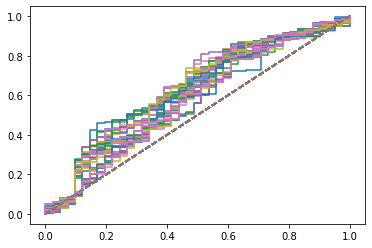

In [ ]:
auc = []
mse = []
for i in range(len(n_features)):
  features = ['CUSTOMER_ID','Corp_Residence_Country_Code', 'BR Code', 'B_PLUS_FLAG'] + list(orig_features[rfe_result[i]])
  X_postRFE = X_rfe_test[features]
  
  cus_ID = X_postRFE['CUSTOMER_ID'].unique()
  ID_train, ID_test = train_test_split(cus_ID, test_size=0.3, random_state=42)

  X_train = X_postRFE[X_postRFE['CUSTOMER_ID'].isin(ID_train)].drop(['CUSTOMER_ID','B_PLUS_FLAG'], axis=1)
  X_test = X_postRFE[X_postRFE['CUSTOMER_ID'].isin(ID_test)].drop(['CUSTOMER_ID', 'B_PLUS_FLAG'], axis=1)
  y_train = X_postRFE[X_postRFE['CUSTOMER_ID'].isin(ID_train)][['B_PLUS_FLAG']]
  y_test = X_postRFE[X_postRFE['CUSTOMER_ID'].isin(ID_test)][['B_PLUS_FLAG']]

  columns = X_train.columns
  columns = columns[2:]

  scaler = StandardScaler()
  X_train[columns] = scaler.fit_transform(X_train[columns])
  X_test[columns] = scaler.transform(X_test[columns])

  X_train = pd.get_dummies(X_train)
  X_test = pd.get_dummies(X_test)

  model = LogisticRegression(max_iter=10000, class_weight='balanced', C=1.0, penalty='l2', solver='newton-cg')
  #model = xgb.XGBClassifier(scale_pos_weight=0.2)
  #model = lgb.LGBMClassifier(scale_pos_weight=0.2)
  model.fit(X_train, np.ravel(y_train))

  pred_proba = model.predict_proba(X_test)
  prob_default = pred_proba[:,1]
  fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
  plt.plot(fallout, sensitivity)#, color = 'darkorange')
  plt.plot([0, 1], [0, 1], linestyle='--')

  y_pred = model.predict(X_test)
  auc.append(roc_auc_score(y_test, prob_default))
  mse.append(mean_squared_error(y_test, y_pred))

plt.show()

# Plotting # features vs the AUC for that many features. From this we can see a plateau occur at ~10-12 features


In [ ]:
sns.lineplot(y=auc, x=n_features)

In [ ]:
auc[11]

0.6278992490197381

# Plotting # features vs the MSE for that many features. From this we can see that 10-12 features has significantly less error compared to 4 features.


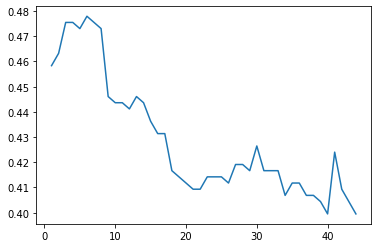

In [ ]:
sns.lineplot(x=n_features, y=mse)

In [ ]:
auc

[0.6114840167475244,
 0.616601315876919,
 0.6376021798365122,
 0.6336146740213996,
 0.6326177975676214,
 0.6288961254735164,
 0.6161361068651557,
 0.6163354821559116,
 0.628032165880242,
 0.6286302917525088,
 0.6289625839037681,
 0.6278992490197381,
 0.6179304844819564,
 0.6175317339004452,
 0.6148733966903701,
 0.6140758955273476,
 0.6152721472718814,
 0.6145411045391108,
 0.6140758955273475,
 0.6148069382601182,
 0.6148069382601182,
 0.6146075629693626,
 0.6147404798298665,
 0.6145411045391108,
 0.603641921977803,
 0.6040406725593143,
 0.6090250548282049,
 0.6096896391307237,
 0.6097560975609755,
 0.6061673423273742,
 0.5772579251678075,
 0.5771914667375557,
 0.5770585498770519,
 0.5755964644115106,
 0.5800491792383864,
 0.5799162623778826,
 0.5815112647039276,
 0.5811789725526681,
 0.5789193859241044,
 0.5789193859241044,
 0.5809131388316607,
 0.5738020867947099,
 0.5748654216787399,
 0.5744666710972286]

In [ ]:
X_train

,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,...,BR Code_48,BR Code_49,BR Code_50,BR Code_51,BR Code_52,BR Code_53,BR Code_54,BR Code_55,BR Code_56,BR Code_57,BR Code_58,BR Code_59,BR Code_60,BR Code_62,BR Code_63,BR Code_64,BR Code_66,BR Code_67,BR Code_68,BR Code_69,BR Code_71,BR Code_72,BR Code_74,BR Code_75,BR Code_76,BR Code_77,BR Code_78,BR Code_80,BR Code_81,BR Code_82,BR Code_83,BR Code_87,BR Code_90,BR Code_91,BR Code_92,BR Code_93,BR Code_94,BR Code_96,BR Code_101,BR Code_107
6824,-1.324140,1.133761,-1.756226,-0.195577,0.651215,-0.775193,-0.614903,-0.113013,-1.350063,-0.159025,-1.665641,1.065152,-0.390815,-0.390748,-1.163610,1.477158,-1.569102,0.600817,-1.188209,0.318050,-1.616544,-1.257501,0.262422,-1.099071,1.315500,0.905677,0.563178,-1.299127,-1.312210,1.320897,0.037492,0.758831,-0.616329,-0.926765,-1.779940,-1.898141,-0.001245,-1.814677,-0.347177,-0.005548,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13739,-0.102497,1.174999,-0.995535,-1.291335,0.209747,-1.321585,-0.697327,-0.053375,-0.092893,0.420810,0.040371,-0.802376,-0.390730,-0.390831,-0.455629,-1.609257,-1.628789,-0.742127,-1.633171,1.645087,-0.012864,-0.684526,-1.422240,-1.127519,-0.395536,0.647451,0.869010,-0.239851,-0.013941,1.369054,-0.025663,-1.007412,-0.629765,1.077315,-2.150938,-0.884719,-1.200439,-0.967356,-0.801136,-1.133770,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9788,-1.532418,-1.691453,0.354306,-0.223821,0.816253,-0.978078,-1.119058,-1.449152,0.775035,1.472927,-0.626876,1.184642,-0.390687,-0.390818,-0.319705,-0.206432,0.464932,0.776276,0.539929,0.168961,-0.934037,0.325363,-1.583286,-0.593117,-0.944712,1.419070,0.623346,-0.160635,-0.307020,-0.526495,-1.641430,-0.702531,0.571972,-0.456022,1.818467,0.658172,-0.135440,1.963682,-1.772605,0.663058,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3021,0.845712,-0.665074,-0.487273,-1.174325,0.557850,0.280671,0.127581,1.615212,0.294788,0.088788,-1.505154,-1.147268,-0.390775,-0.390734,1.226726,-0.922456,1.619887,0.831438,-0.858825,-1.510147,-0.733482,-0.101388,0.159164,-1.782329,-0.193203,0.283670,0.737853,0.201467,0.822066,-1.265976,0.357491,-1.158862,-2.118564,0.481108,-0.197854,-0.017428,-0.865623,0.724131,0.007834,0.358090,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14920,0.038593,0.831295,1.514192,0.958323,-0.061808,1.207620,0.759334,1.848698,1.833814,0.879918,-0.886501,-0.200022,-0.390832,-0.390843,0.353788,1.083002,-0.110404,-1.037811,1.836586,-0.148873,-1.452035,0.206014,-0.277052,1.166391,-0.990283,-0.601361,0.712928,1.220673,1.851539,-0.287506,-1.276222,-0.443674,-0.113318,-1.701708,0.785096,-1.586487,0.117241,0.639566,-0.096134,-1.278836,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,-1.548948,0.068937,0.486428,-0.260306,-1.400342,1.235272,1.404725,-0.185027,-1.578252,-0.153945,-0.396023,-0.102849,-0.390792,-0.390723,1.125962,-1.678771,1.404586,1.437911,1.149118,-0.616351,1.520583,-1.076006,-1.606813,-0.111120,-0.052007,-1.955827,-1.585913,0.996663,0.515611,-0.437503,0.047216,0.869765,-0.600115,1.188128,0.843514,0.946716,2.02746

### Final list of features, reduced from > 140 features to 14 features (feature reduction of ~90%)

In [ ]:
features = ['CUSTOMER_ID','Corp_Residence_Country_Code', 'BR Code', 'B_PLUS_FLAG'] + list(orig_features[rfe_result[11]])

In [ ]:
features

['CUSTOMER_ID',
 'Corp_Residence_Country_Code',
 'BR Code',
 'B_PLUS_FLAG',
 'TOTALASSET_Y0',
 'TOTALREVENUE_Y0',
 'CURRENTLIABILITY_Y0',
 'TOTALEQUITY_Y0',
 'TOTALNETWORTH_Y0',
 'INVENTORYDAYS_Y0',
 'payableDAYS_Y0',
 'OPERPROFIT_Y0',
 'SBTL',
 'OPE',
 'OROA',
 'SHORTTERM_LEVERAGE']

In [ ]:
features = ['CUSTOMER_ID',
 'Corp_Residence_Country_Code',
 'BR Code',
 'B_PLUS_FLAG',
 'TOTALASSET_Y0',
 'TOTALREVENUE_Y0',
 'CURRENTLIABILITY_Y0',
 'TOTALEQUITY_Y0',
 'TOTALNETWORTH_Y0',
 'INVENTORYDAYS_Y0',
 'payableDAYS_Y0',
 'OPERPROFIT_Y0',
 'SBTL',
 'OPE',
 'OROA',
 'SHORTTERM_LEVERAGE']

## Final list of remaining (14) features after feature engineering and then feature reduction

Feature Category  | Feature Name  
------------- | -------------
Solvency Risk  | Total assets 
_  | Total revenue 
_  | Current liability 
_  | Short term leverage
_  | Total equity 
_  | Net worth 
Operational Ability  | Inventory days 
_  | Payable days 
_  | Other payroll expenses 
Profitability  | Operating profit 
_  | Return on equity  
_  | Operating return on assets 
Permanent Features  | Country Code 
_  | Industry Code 